In [127]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, timedelta
from collections import defaultdict


In [2]:
def source2country(source_list):
    country_list = []
    
    for source in source_list:
        if source in {'The New York Times', 'VOA Voice of America', 'CNN International', 'Fox News'}:
            country_list.append('United States')
        elif source in {'Agence France-Presse', 'France 24'}:
            country_list.append('France')
        elif source in {'China Daily', 'Global Times'}:
            country_list.append('China-Mainland')
        elif source in {'Hong Kong Free Press HKFP', 'South China Morning Post'}:
            country_list.append('China-HK')
        elif source in {'RT', 'Meduza', 'The Moscow Times', 'Sputnik'}:
            country_list.append('Russia')
        elif source in {'IFPnews', 'Iran daily', 'Tehran Times'}:
            country_list.append('Iran')
        elif source in {'Latin American Herald Tribune', 'Entorno Inteligente'}:
            country_list.append('Venezuela')
        elif source in {'Al Jazeera English'}:
            country_list.append('Qatar')
            
    return country_list

In [3]:
with open('articles_all.json', 'r') as f:
    data = pd.json_normalize(json.load(f))
    data['source.country'] = source2country(data['source.title'])

In [4]:
data.groupby(['protest']).sentiment.mean()

protest
France      -0.129096
Hong Kong   -0.082771
Iran        -0.170415
Venezuela   -0.064908
Name: sentiment, dtype: float64

In [5]:
data.groupby(['protest', 'source.country']).sentiment.mean()

protest    source.country
France     China-HK         -0.141691
           China-Mainland   -0.118633
           France           -0.135602
           Iran             -0.161269
           Qatar            -0.158867
           Russia           -0.154260
           United States    -0.082087
           Venezuela        -0.096497
Hong Kong  China-HK         -0.080435
           China-Mainland   -0.013356
           France           -0.167131
           Iran             -0.156134
           Qatar            -0.168373
           Russia           -0.115701
           United States    -0.079317
           Venezuela        -0.104154
Iran       China-HK         -0.213832
           China-Mainland   -0.167484
           France           -0.228221
           Iran             -0.102590
           Qatar            -0.196625
           Russia           -0.188612
           United States    -0.185452
           Venezuela        -0.204444
Venezuela  China-HK         -0.029692
           China-Mainlan

In [6]:
protests_by_dates = data[['protest', 'source.country']]
protests_by_dates.loc[:,'date'] = pd.to_datetime(data.loc[:,'date'])

/home/artidoro/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/artidoro/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


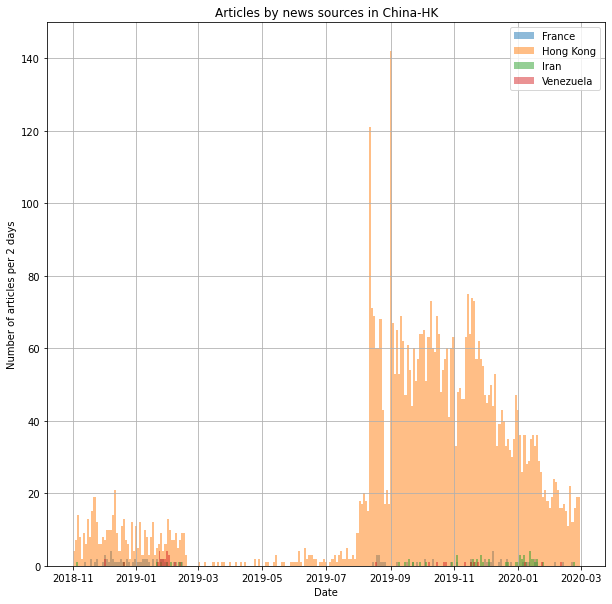

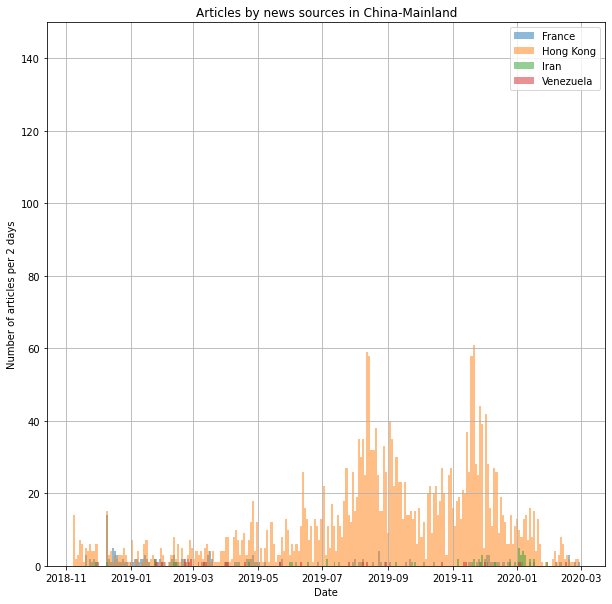

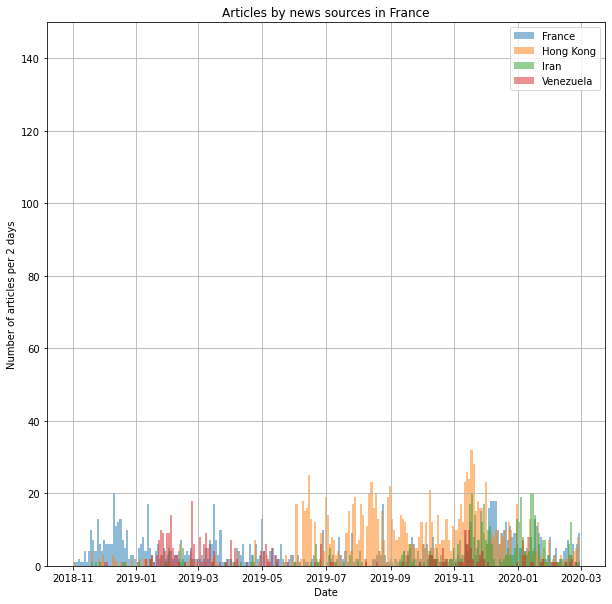

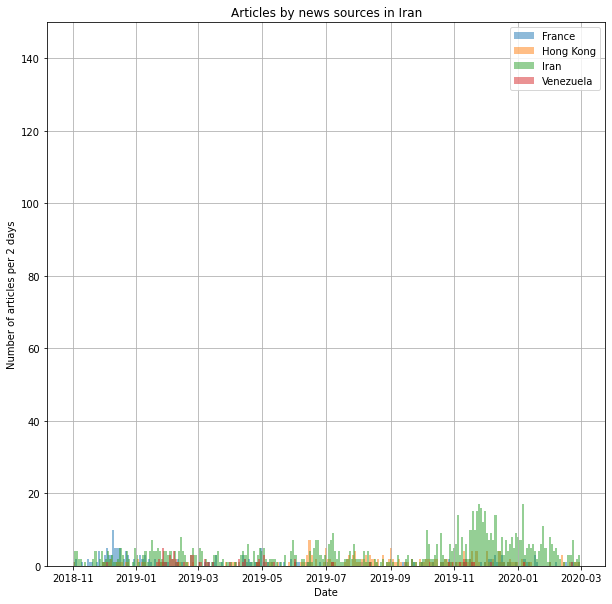

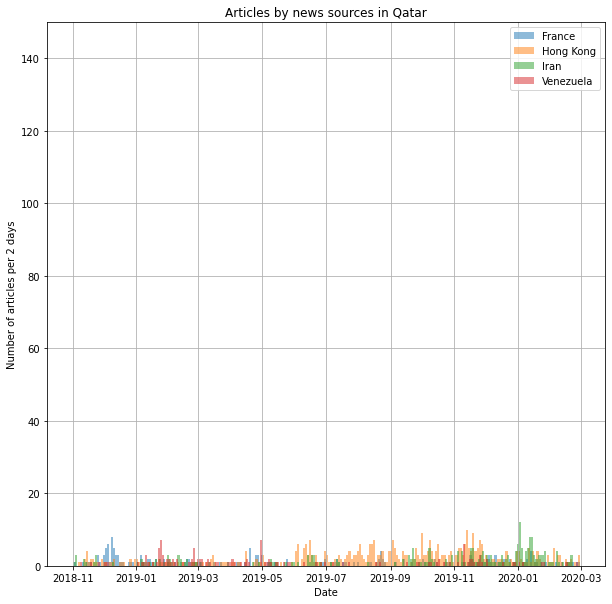

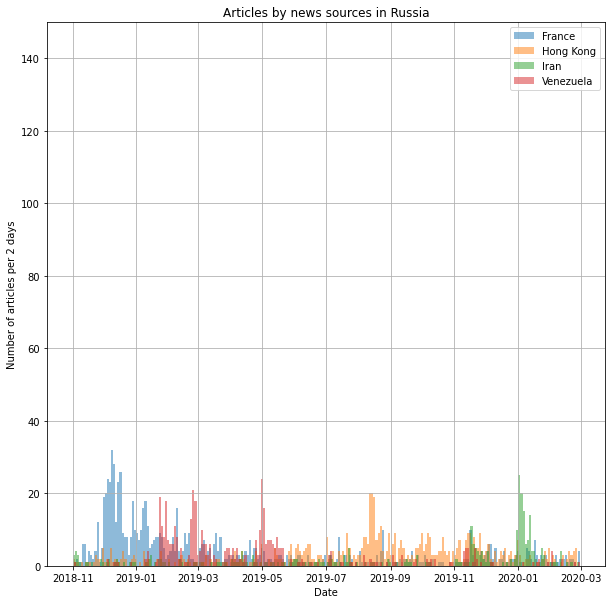

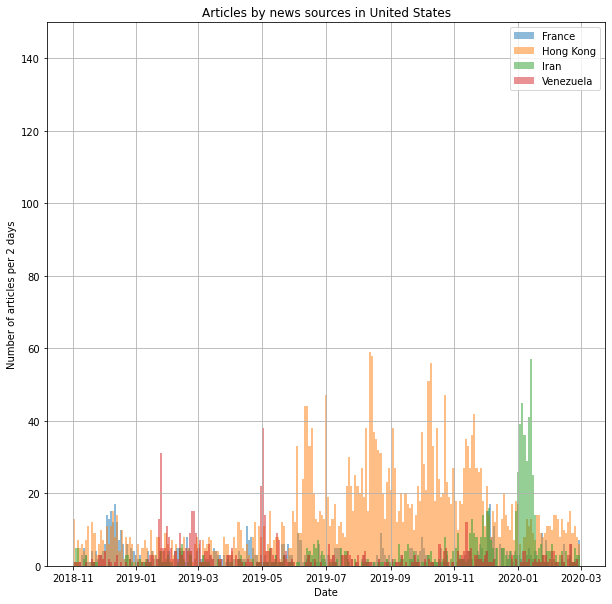

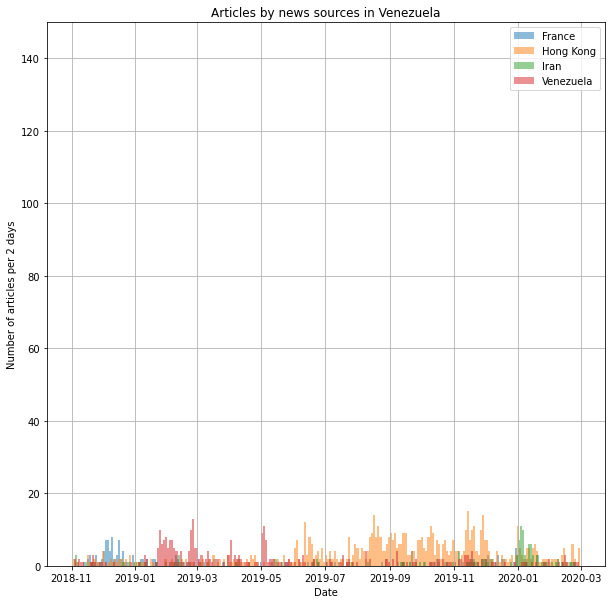

In [7]:
for source_country in sorted(set(data['source.country'])):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Articles by news sources in '+source_country)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of articles per 2 days')
    for label, df in protests_by_dates[protests_by_dates['source.country']==source_country].groupby('protest'):
        df.date.hist(ax=ax, label=label, bins=243, alpha=0.5)
        plt.legend()
        plt.ylim((0,150))
    plt.show()
    fig.savefig("news-source_graph_{}.png".format(source_country.replace(' ','')))

In [185]:
locations = ['Venezuela', 'France', 'Hong Kong', 'Iran']
sources = {
    'us': ['nytimes.com', 'cnn.com', 'voanews.com', 'foxnews.com'], 
    'china': ['globaltimes.cn', 'scmp.com', 'hongkongfp.com', 'chinadaily.com.cn'], # china news ecns.cn, shine.cn
    'france': ['france24.com', 'afp.com'],
    'iran': ['iran-daily.com', 'tehrantimes.com', 'ifpnews.com'],
    'venezuela': ['entornointeligente.com', 'laht.com'],
    'russia': ['sputniknews.com', 'rt.com', 'themoscowtimes.com', 'meduza.io'], # therussophile.org has 2.3M articles
    'qatar': ['aljazeera.com']
}
dates = {
    'Venezuela': {'date_start': '2019-01-01', 'date_end': '2019-11-30'},
    'France': {'date_start': '2018-11-01', 'date_end': '2019-03-31'},
    'Hong Kong': {'date_start': '2019-06-01', 'date_end': '2019-12-31'},
    'Iran': {'date_start': '2019-11-01', 'date_end': '2020-02-29'}
}
date_start = '2018-11-01'
date_end = '2020-02-29'
protest_key_words = [
    'protest', 'protesters', 'protester',
    'demonstration', 'demonstrations', 'demonstrators', 'demonstrator'
    'clash', 'clashes',
    'riot', 'riots',
    'barricades', 'barricade',
    'tear gas',
    'unrest', 'unrests',
    'revolt',
    'upheaval',
    'uproar',
    'manifestation', 'manifestations'
]
protest_specific_key_words = {
'Venezuela':['maduro', 'guaido', 'venezuela', 'caracas', 'venezuelan', 'juan', 'venezuelans', 'nicolas', 'lopez', 'chavez', 'cabello', 'leopoldo', 'diosdado', 'hyperinflation', 'latin', 'shortages', 'cucuta', 'hugo', 'padrino'],
'France':['paris', 'macron', 'yellow', 'french', 'france', 'champs', 'elysees', 'vest', 'vests', 'arc', 'triomphe', 'emmanuel', 'avenue', 'christophe', 'castaner', 'jackets', 'philippe', 'elysee', 'marseille', 'michel', 'edouard', 'lyon'],
'Hong Kong':['hong', 'kong', 'china', 'lam', 'chinese', 'extradition', 'beijing', 'mainland', 'carrie', 'wong', 'long', 'yuen', 'cheung', 'chan', 'communist', 'xi', 'kowloon', 'xinjiang', 'kongers', 'chinese'],
'Iran':['iran', 'iranian', 'tehran', 'soleimani', 'khamenei', 'irgc', 'ali', 'ayatollah', 'fadavi', 'drone', 'iranians', 'irbil', 'erbil', 'rouhani', 'mousavi', 'khuzestan', 'persian', 'zarif']
}
colors = {
    'us': {'nytimes.com':'forestgreen', 
           'cnn.com':'seagreen',
           'voanews.com':'mediumseagreen',
           'foxnews.com':'green' },
    'china': {'globaltimes.cn':'greenyellow',
              'scmp.com':'chartreuse', 
              'hongkongfp.com':'lawngreen', 
              'chinadaily.com.cn':'lime'}, # china news ecns.cn, shine.cn
    'france': {'france24.com':'gold', 
               'afp.com':'orange'},
    'iran': {'iran-daily.com':'aqua', 
             'tehrantimes.com':'cyan', 
             'ifpnews.com':'darkturquoise'},
    'venezuela': {'entornointeligente.com':'red', 
                  'laht.com':'tomato'},
    'russia': {'sputniknews.com':'dimgray', 
               'rt.com':'gray', 
               'themoscowtimes.com':'darkgray', 
               'meduza.io':'silver'}, # therussophile.org has 2.3M articles
    'qatar': {'aljazeera.com':'pink'}
}
colors_array = [colors[source_origin][source] for source_origin in colors for source in colors[source_origin] ]
source_array = [source for source_origin in sources for source in sources[source_origin]]
bin_size_protest = {
    'Venezuela':10, 
    'France':3, 
    'Hong Kong':5, 
    'Iran':5
}

In [37]:
with open('articles_all.json') as f:
    articles = json.loads(f.read())

articles_location = dict()
for location in locations:
    articles_location[location] = [article for article in articles if article['protest'] == location]

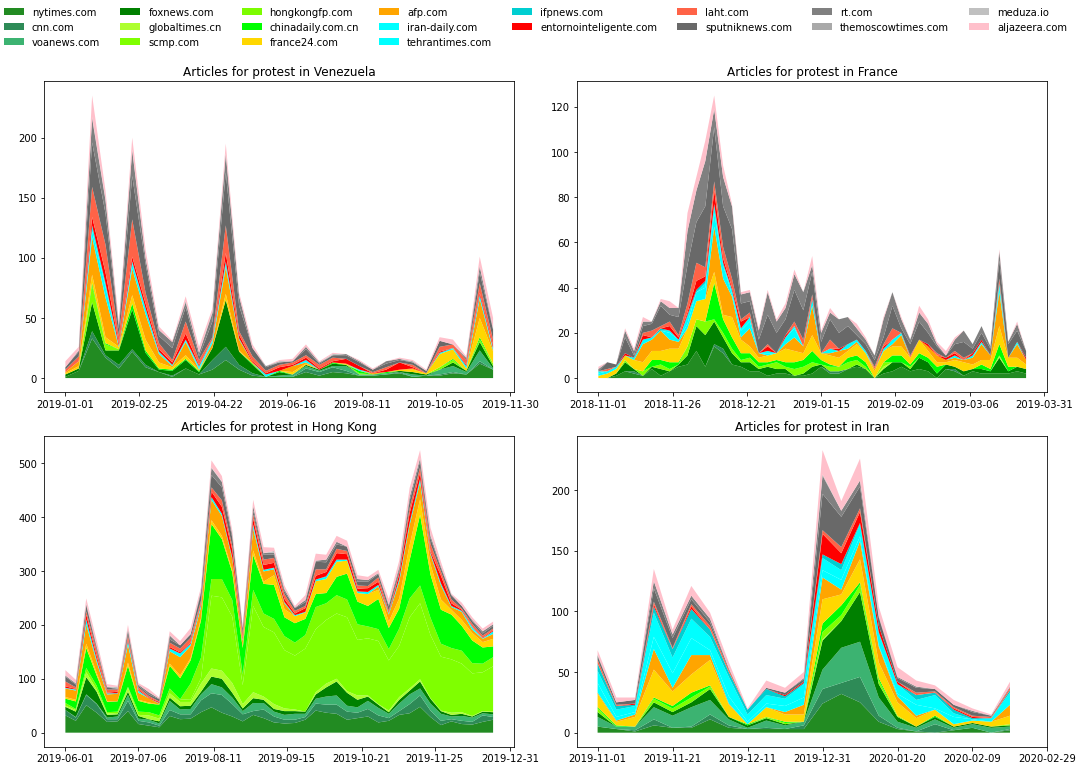

In [186]:
fig = plt.figure(figsize=(15, 10))
for idx,location in enumerate(locations):
    start_date = date.fromisoformat(dates[location]['date_start'])
    end_date = date.fromisoformat(dates[location]['date_end'])
    bins = np.arange(start_date, end_date, step=bin_size_protest[location])
    y = []
    for source_origin in sources:
        for source in sources[source_origin]:
            extract_dates = [date.fromisoformat(article['date']) for article in articles_location[location] if article['source']['uri'] == source]
            y.append(np.histogram(extract_dates, bins=bins)[0])
    x = np.histogram(extract_dates, bins=bins)[1]
    y_stack = np.row_stack(y)
    y_stack = np.concatenate([np.zeros((1, y_stack.shape[1])), y_stack], axis=0)
    y_cum = np.cumsum(y_stack, axis=0)

    ax = fig.add_subplot(2, 2, idx+1)
    for i in range(y_stack.shape[0]-1):
        ax.fill_between(x[:-1], y_cum[i,:], y_cum[i+1,:], facecolor=colors_array[i], label=source_array[i])
    ax.set_title('Articles for protest in {}'.format(location))
    xticks = np.linspace(pd.Timestamp(start_date).value, pd.Timestamp(end_date).value, 7)
    xticks = [elt.date() for elt in pd.to_datetime(xticks)]
    ax.set_xticks(xticks)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor= (0.0, 1.), ncol=8,
            borderaxespad=0, frameon=False)
# plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.tight_layout()
# plt.show()
plt.savefig('protests_stats.png',dpi=200, bbox_inches='tight')


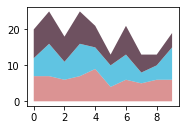

In [69]:
# just create some random data
fnx = lambda : np.random.randint(3, 10, 10)
y = np.row_stack((fnx(), fnx(), fnx()))   
# this call to 'cumsum' (cumulative sum), passing in your y data, 
# is necessary to avoid having to manually order the datasets
x = np.arange(10) 
y_stack = np.cumsum(y, axis=0)   # a 3x10 array

fig = plt.figure()
ax1 = fig.add_subplot(221)

ax1.fill_between(x, 0, y_stack[0,:], facecolor="#CC6666", alpha=.7)
ax1.fill_between(x, y_stack[0,:], y_stack[1,:], facecolor="#1DACD6", alpha=.7)
ax1.fill_between(x, y_stack[1,:], y_stack[2,:], facecolor="#6E5160")

plt.show()

In [110]:
x[:-1].shape

(48,)

In [81]:
np.concatenate((np.zeros((1, 10)), y), 0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [7., 7., 6., 7., 9., 4., 6., 5., 6., 6.],
       [5., 9., 5., 9., 6., 6., 7., 3., 4., 9.],
       [8., 9., 7., 9., 6., 3., 8., 5., 3., 4.]])

In [51]:
len(articles_location['Venezuela'])

1967

In [42]:
len([date.fromisoformat(article['date']) for article in articles_location[location]])

1967

In [47]:
sum([  5,  23,  22, 177, 137,  82,  30, 142, 100,  67,  35,  12,  41,
         45,  23,  13,  18, 203,  52,  50,  19,  13,   8,  11,   8,  11,
         26,   3,  18,  15,   5,  24,   8,   4,   8,  13,  11,   8,  11,
          4,  26,  18,  24,   9,  46,  70,  36])

1734

In [58]:
articles[0]

{'uri': '1207186411',
 'lang': 'eng',
 'isDuplicate': False,
 'date': '2019-08-05',
 'time': '14:21:00',
 'dateTime': '2019-08-05T14:21:00Z',
 'dateTimePub': None,
 'dataType': 'news',
 'sim': 0.6784313917160034,
 'url': 'https://www.nytimes.com/2019/08/04/world/asia/hong-kong-protest.html',
 'title': 'Hong Kong Strike: Spreading Clashes Paralyze City',
 'body': 'Demonstrators are moving between districts, blocking roads and setting fires.\n\nHere\'s what you need to know:Tear gas engulfed districts as protesters besieged police stations.City\'s leader warns protesters against challenging Beijing.Protesters occupy a shopping mall where clashes erupted last month.Demonstrators rally across the city.Police say hundreds have been arrested this summer.Tear gas engulfed districts as protesters besieged police stations.\n\nRiot police officers fired many volleys of tear gas at protesters near government offices, apartment complexes, shopping malls and parks across Hong Kong on Monday, as cla

['forestgreen',
 'seagreen',
 'mediumseagreen',
 'green',
 'skyblue',
 'lightskyblue',
 'deepskyblue',
 'dodgerblue',
 'gold',
 'organge',
 'red',
 'salmon',
 'tomato',
 'darkviolet',
 'mediumorchid',
 'deeppink',
 'hotpink',
 'palevioletred',
 'pink',
 'peachpuff']